# ACTIVIDAD 1 - ARBOLES Y RANDOM FOREST PARA REGRESIÓN Y CLASIFICACIÓN

# Índice
[1. Preparación del entorno](#1)   
&nbsp;&nbsp;[1.1. Importación de librerias](#1.1)  
&nbsp;&nbsp;[1.2. Carga de datos](#1.2)  
[2. Analisis descriptivo de los datos](#2)


# 1. Preparación del entorno <a name="1"></a>

## 1.1. Importación de librerias <a name="1.1"></a>

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# Representacion y graficos
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, confusion_matrix, \
accuracy_score, roc_auc_score, f1_score, recall_score

## 1.2. Carga de datos <a name="1.1"></a>

##### Cargar el dataframe

In [2]:
df = pd.read_csv("housing_train.csv").drop(columns=["Id"])

# 2. Analisis desctiptivo de los datos <a name="2"></a>

##### Variables categoricas y numéricas 

Separamos primero las diferentes variables del dataset en categoricas y numericas observando su tipo y las asignamos a dos nuevas listas de datos, después ambas listas se muestran por pantalla.

In [3]:
numericos = [f for f in df.columns if df.dtypes[f] != 'object']
numericos.remove('SalePrice')
categoricos = [f for f in df.columns if df.dtypes[f] == 'object']

print("Datos categoricos: {}".format(categoricos))
print()
print("Datos numericos: {}".format(numericos))

Datos categoricos: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Datos numericos: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',

##### Datos estadisticos de las variables numéricas

De las variables numéricas se muestran los distintos datos de media, mediana, minimo, máximo y cuartiles.

In [4]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Datos de las variables categóricas

Para las variables categóricas se listan a continuación la frecuencia de cada clase.

In [5]:
for categoria in categoricos:
    print(categoria)
    print(pd.value_counts(df[categoria]))
    print()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn

##### Correlaciones de los datos

Primero de todo encontramos la matriz de correlación con todas las variables.

In [6]:
df.corr(method="pearson")

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


Para poder identificar mejor las variables correlacionadas entre si, se ha realizado un mapa de calor, donde los valores de correlación mayores a 0.75 son mostrados en blanco. Como el valor de SalePrice es la variable de interés para el problema, se ha puesto como primera variable, y se han ordenado las otras a partir de esta.

##### Columnas con porcentaje de valores nulos mas elevados

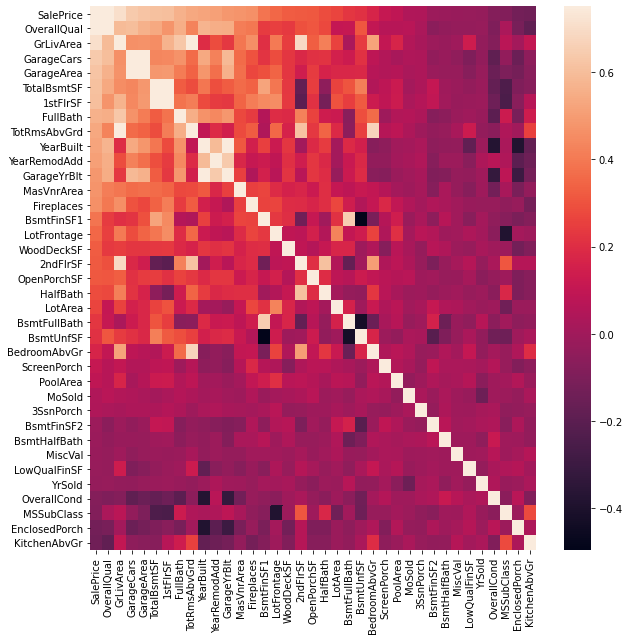

In [7]:
train = df
columns = df.corr(method="pearson")["SalePrice"].sort_values(ascending=False)[:].index #:15 o dejamos todos¿?

corr = train[columns].corr(method="pearson")

plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=0.75);

Para tener más seguridad antes de eliminar los datos, tambien se muestran los 3 valores máximos para cada variable de correlacion, ignorando la correlación de valor 1 de la misma variable.

In [8]:
for column in columns:
  temp = df.corr(method="pearson")[column].sort_values(ascending=False)[1:4]
  print("{}: {}".format(column,temp))
  print("#############################################")

SalePrice: OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
Name: SalePrice, dtype: float64
#############################################
OverallQual: SalePrice     0.790982
GarageCars    0.600671
GrLivArea     0.593007
Name: OverallQual, dtype: float64
#############################################
GrLivArea: TotRmsAbvGrd    0.825489
SalePrice       0.708624
2ndFlrSF        0.687501
Name: GrLivArea, dtype: float64
#############################################
GarageCars: GarageArea     0.882475
SalePrice      0.640409
OverallQual    0.600671
Name: GarageCars, dtype: float64
#############################################
GarageArea: GarageCars     0.882475
SalePrice      0.623431
GarageYrBlt    0.564567
Name: GarageArea, dtype: float64
#############################################
TotalBsmtSF: 1stFlrSF       0.819530
SalePrice      0.613581
OverallQual    0.537808
Name: TotalBsmtSF, dtype: float64
#############################################
1stFlrSF: TotalBsmtSF 

Juntado el mapa de calor con los datos obtenidos en este punto, podemos eliminar ciertas variables por su correlación. 

La primera que hemos decidido eliminar es la de 'GarageArea', esta tiene alta correlación con la variable de 'GarageCars', además logicamente el area del garage esta muy ligada al numero de coches que pueden haber, y se elimina la de area porque son valores mucho mayores que la del numero de coches que son valores más acotados.

Por otro lado, la variable de 'OverallQual' tiene una alta correlacion con la de 'SalePrice' que es la variable a predecir, y esta con ciertas operaciones puede llevar a encontrar directamente el valor esperado del precio, cosa que no es interesante, ya que un modelo entrenado de esta forma, daría malas predicciones si faltara la calidad general de la casa, por este motivo también se elimina.

In [9]:
#Eliminamos variables con alta correlacion y con sentido
df.drop(["GarageArea","OverallQual"],axis=1,inplace=True)

# 3. Tratamiento de missing

El primer paso realizado ha sido identificar el porcentage de valores faltantes en las distintas columnas y mostrar los más altos.

In [10]:
(((df.isnull().sum()/ len(df)).sort_values(ascending=False)[:10])*100)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
dtype: float64

Como se puede observar, existen un total de 6 variables con valores faltantes mayores al 10%, como se considera que es suficientemente grande la falta de datos, estas columnas se eliminan para evitar añadir error en las predicciones debido a añadir demasiados datos no reales.

In [11]:
 df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage","LotFrontage"],axis=1,inplace=True)

El siguiente paso realizado en el tratamiento de missing trata de analizar las variables que tienen información sobre el garage.

Con los porcentages de error de los atributos relacionados con el garaje se pueve ver como todas las variables de garaje tienen el mismo valor de nulos y además observando los datos estos coinciden, en este caso se considera que no existe garaje y por lo tanto se reemplazn los valores NaN con una categoría adicional denominada "None". 

Para comprovar que esta suposición es cierta solo es necesario comparar si el numero de garages con capacidad para 0 coches equivale a el numero de garajes con las variables faltantes.


In [12]:
df['GarageType'].isnull().sum()==(df['GarageCars']==0).sum() #Comparacion

True

Como es cierta la compración se puede proceder a aplicar el reemplazamiento mencionado.

In [13]:
# NaN en garage implica que no hay garage
df["GarageYrBlt"].fillna("None",inplace=True)
df["GarageType"].fillna("None",inplace=True)
df["GarageFinish"].fillna("None",inplace=True)
df["GarageCond"].fillna("None",inplace=True)
df["GarageQual"].fillna("None",inplace=True)

Se van a tratar también con cierto detalle las otras variables que tienen valores missing para poder obtener una mejor predicción. A continuación se muestran las variables que aún tienen valores missing:

In [14]:
(((df.isnull().sum()/ len(df)).sort_values(ascending=False)[:10])*100)

BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
ExterQual       0.000000
Exterior1st     0.000000
dtype: float64

Un tipo de variables que son muy parecidas a las de garaje son las del sotano. Aunque para estas se harà un analisis, ya que las de BsmtFinType2 y BsmtExposure tienen más variables nulas que las otras correspondientes a sotano. Para ello se muestran todas las filas con valores NaN correspondientes a columnas relacionadas con el sotano.

In [15]:
df_basement=df[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","BsmtFullBath","BsmtHalfBath"]]

df_basement[df_basement.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
332,Gd,TA,No,GLQ,1124,NaN,479,1603,1,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0


Modificamos el dataset de forma correcta directamente ya que son solo 2 variables para tratar directamente en conjunto de BsmtFinType2 y BsmtExposure donde se les asigna la categoría específica de 'No', ya que tienen sotano pero se considera que no disponen de esa característica y por lo tanto debe ser marcado como tal.

In [16]:
#Reemplazar variables concretas
df['BsmtFinType2'][332]='No'
df['BsmtExposure'][948]='No'

En el resto de casos, donde el sotano no esta entrado se asume que no tienen y por lo tanto las variables relacionadas con el sotano se van a tratar como las de garaje, reemplazando los NaN por un nuevo tipo llamado 'None' como en el caso de los garajes.

In [17]:
# Los valores faltantes en las variables Bsmnt implican que no hay ningun sotano.
df["BsmtFinType2"].fillna("None",inplace=True)
df["BsmtExposure"].fillna("None",inplace=True)
df["BsmtQual"].fillna("None",inplace=True)
df["BsmtFinType1"].fillna("None",inplace=True)
df["BsmtCond"].fillna("None",inplace=True)

En este punto ya se han corregido la mayoría de valores missing, pero aún faltan unos pocos. Los proximos que se van a tratar son los relacionados con la mapostería.

En este caso no hay ninguna relación que pueda indicar el tipo de material ni el area relacionadas con la mapostería, por lo tanto, se decide asumir que si los valores faltan no hay mapostería, y por lo tanto se reemplazan los missing por el tipo llamado "None" y el area se considera que es 0 ya que al no existir mapostería tampoco habría ninguna area a tener en cuenta para ello.

In [18]:
# Las variables con valores nulo en la maposteria impilcan que probablemente no hay maposteria, por lo que se llena con ...
df["MasVnrType"].fillna("None",inplace=True)
df["MasVnrArea"].fillna(0.0,inplace=True)

En este punto solo queda el atributo llamado "Electrical", en este caso solo es una única variable, y observando como se reparten los distintos tipos se puede ver que la gran mayoría es del tipo SBrkr y por lo tanto asignamos este tipo a la variable faltante.

In [19]:
# El valor restante en electricidad, hemos puesto el sistema estandard pues es el mas comun
df["Electrical"].fillna("SBrkr", inplace=True)

Por último se revisa que no exista ningún valor del tipo NaN en ninguna de las variables.

In [20]:
(((df.isnull().sum()/ len(df)).sort_values(ascending=False)[:10])*100)

SalePrice        0.0
SaleCondition    0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
dtype: float64

# 4. Problema de regresión

El problema de regresión es el primero que se va a afrontar. En este caso se realizará la predicción de la variable de 'SalePrice' con arbol de decisión y con random forest para poder comparar su desempeño. 

En este punto, sería interesante realizar una normalización de los datos para mejorar los resultados, ya que algunas de las variables y sobretodo la variable de interes tienen valores altos. Un punto importante es que esta normalización requiere de que se pueda deshacer para comprovar los resultados de las predicciones. En este caso se ha decidido no realizarla ya que el punto de la actividad es comprar los árboles de decisión frente a los random forest, y sin hacer la normalización ya se puede realizar.

In [21]:
df.iloc[:,:-1]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,112,0,0,0,0,4,2010,WD,Normal


In [22]:
X = df.iloc[:,:-1]
y = df["SalePrice"]

Se crea una funcion para mostrar los valores de los distintos errores que tendra la predicción realizada en el problema de regresión.

In [23]:
def regresion(X_train, X_test, y_train, y_test, regresor, metricas_error_off=False):
    regresor.fit(X_train, y_train)
    
    predicciones = regresor.predict(X_test)
    
    if not(metricas_error_off):
        print(f"MSE: {mean_squared_error(y_test, predicciones)}")
        print(f"MAE: {mean_absolute_error(y_test, predicciones)}")
        print(f"RMSE: {mean_squared_error(y_test, predicciones, squared=False)}")
        print(f"RMSLE: {np.sqrt(mean_squared_log_error(y_test, predicciones))}")
    
    return predicciones

En python, para entrenar un modelo para un problema de regresión no se pueden utilizar variables cualitativas, como estas son de interés, se realiza una función con la que transformar estas variables cualitativas en variables numéricas. Para ello se crean nuevas columnas con cada possible valor de las variables cualitativas y en cada fila se indica de forma booleana si la classe esa corresponde o no a esa fila. Una cosa a remarcar es que en la conversión se elimina una columna de cada una de las cualitativas, ya que el no hacerlo podría dar lugar a problemas.

In [24]:
def cual2num(df_,feature):
    df = df_.copy(deep=True)
    dummy = pd.get_dummies(df[feature])
    dummy = dummy.drop(dummy.columns[-1],axis=1)
    df = pd.concat([df,dummy],axis=1)
    return df.drop(feature, axis=1)

#Se obtienen los nuevos datos catagoricos despues de eliminar las distintas columnas
new_categoricos = [column for column in df.columns if df.dtypes[column] == 'object']

En este punto se separan los conjuntos de datos de entrenamiento de los de test, para ello se utiliza un 80% de los datos para el entrenamiento y el 20% restante corresponden a los de test. Estos datos se van a usar tento para el arbol de decisión como para el random forest, de esta forma se evitará cualquier possible cambio en el error de predicción debido a la separación de los datos.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(cual2num(X,new_categoricos), y, test_size = 0.2 ,random_state = 42)

##### Arbol de decisión

Primero de todo, se crea el arbol de decision completo y se muestra su representación gráfica para comprovar si es necesario hacer la poda.

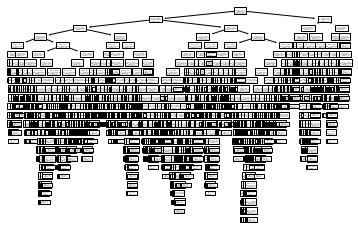

In [26]:
dt = tree.DecisionTreeRegressor(random_state=42)

fig = plt.figure()
dt.fit(X_train, y_train)
tree.plot_tree(dt);

Solo con observar la imagen del arbol ya se puede ver que es necesario podarlo porque es demasiado grande y esto provocaría overfitting.

Para realizar la poda del arbol, primero se tiene que obtener la profundidad más optima para el arbol, para ello se representa en una gráfica el score del arbol obtenido según los niveles usados para entrenarlo. 

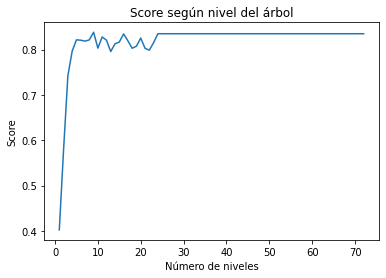

In [27]:
scores = []
num_variables = len(list(df))
n_niveles = range(1, num_variables + 1)
for n in n_niveles:
    dt.set_params(max_depth = n)
    dt.fit(X_train, y_train)
    scores.append(dt.score(X_test, y_test))
    
plt.title("Score según nivel del árbol")
plt.xlabel("Número de niveles")
plt.ylabel("Score")
plt.plot(n_niveles, scores)
plt.show()

Como indica la comprovación, el valor de profundidad igual a 8 es donde se obtiene el valor máximo de score y se ha estabilizado, por lo tanto el arbol va a tener esta profundidad.

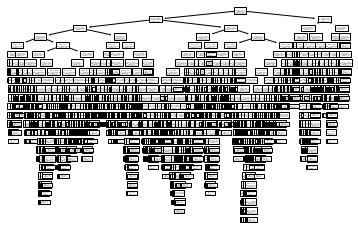

In [28]:
dt = tree.DecisionTreeRegressor(random_state=42, max_depth = 8)

fig = plt.figure()
dt.fit(X_train, y_train)
tree.plot_tree(dt);

Se puede observar como el arbol ha mejorado bastante y es mucho más interpretable, este árbol ya sirve para realizar predicciones genericas.

En este caso se muestran los distintos errores de predicción para poder evaluar lo bueno que es el modelo entrenado.

In [29]:
predicciones=regresion(X_train, X_test, y_train, y_test, dt);

MSE: 1265503304.9726028
MAE: 24067.869863013697
RMSE: 35573.91326481531
RMSLE: 0.20848293097501297


Como se puede apreciar, los errores tienen valores bastante grandes aparte del RMSLE, esto es debido a que los precios de las casas son valores muy altos, y un error que en estos rangos puede ser proporcionalmente pequeño, hace que sean valores muy altos.

Para comparar se utilizará la metrica del error medio cuadrático (MSE). En este caso tiene un valor relativamente grande, ya que tratando con precios de las viviendas, este error aumenta en gran cantidad. Para comprovar lo correcto que es el árbol, se representa el gráfico de dispersión de los valores reales contra las predicciones.

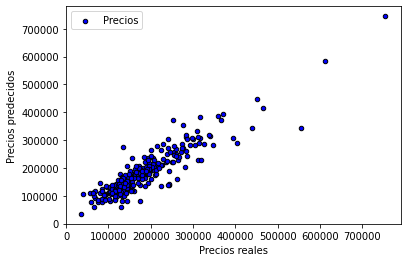

In [30]:
# Generar plot basado en la distribución de datos de prueba y datos de predicción
def dibujar_dispersion(real, predicted):
    plt.scatter(real, predicted, s=20, edgecolor="black", c="blue", label="Precios")
    plt.xlabel("Precios reales")
    plt.ylabel("Precios predecidos")
    plt.legend()
    plt.show()
    
dibujar_dispersion(y_test, predicciones)

Como se puede ver, los valores se encuentran bastante centrados en la disagonal, por lo tanto se confirma que el modelo de arbol es correcto.

##### Random forest

Para realizar la comparación entre el modelo de arbol de decisión y el de random forest, se crean distintos bosques utilizando los mismos conjuntos de entrenamiento y test que para el arbol de decisión y cambiando el número de arboles entre ellos para encontrar el valor más óptimo.

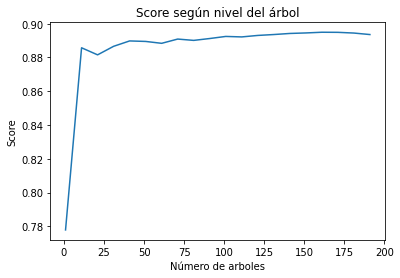

In [31]:
rf = RandomForestRegressor(random_state=42, max_features='auto')

scores = []
for n in np.arange(1,200,10):
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
    
plt.title("Score según nivel del árbol")
plt.xlabel("Número de arboles")
plt.ylabel("Score")
plt.plot(np.arange(1,200,10), scores)
plt.show()

Como se puede observar, el valor de 50 arboles es el que tiene valor más optimo para utilizar ya que se acerca al máximo de score y tiene un número reducido de arboles, por lo tanto se crea el bosque con este número para ser comparado con los resultados del arbol de decision.

In [32]:
rf = RandomForestRegressor(n_estimators = 50, random_state=42, max_features='auto')
predicciones_rf = regresion(X_train, X_test, y_train, y_test, rf);

MSE: 851929445.8549521
MAE: 17241.877602739725
RMSE: 29187.83044104087
RMSLE: 0.15706842421917117


Como se ha comentado para el arbol, se usará la metrica de MSE para analizar el error del bosque y comparar este con el arbol de decisión.

Por un lado, observando el valor de la metrica de error MSE se puede ver que tiene un valor alto de unos 852 millones, pero en este rango de valores es normal tener estos números como se ha comentado anteriormente. Para ello se repersenta la gráfica de comparación como se ha realizado para el árbol.

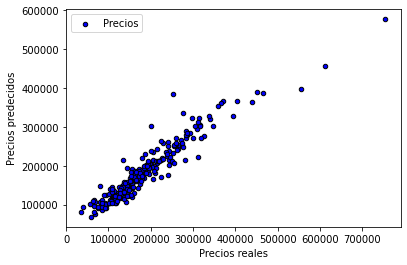

In [33]:
dibujar_dispersion(y_test, predicciones_rf)

Por otro lado, haciendo la comparación entre el error del arbol de decisión y el del random forest, el valor de MSE es bastante menor en el bosque siendo este de unos 500 millones menos y por lo tanto, en un caso real se utilizaria un random forest ya que predice con más precisión. Además se puede ver como en el bosque los datos estan mucho más centrados en la diagonal, por lo tanto a simple vista ya indica que es mejor.

Aunque los dos modelos son válidos, y un punto a favor que tiene el arbol es que se puede interpretar viendo la imagen, no como el bosque que es un modelo de caja negra. Por lo tanto según el caso, se podría llegar a seleccionar el arbol por delante del bosque.

# 5. Problema de clasificación

Este es el segundo problema que se va a aforntar. Para este caso, se hará una clasificación de los precios en tres clases distintas:

* Grupo 1: SalePrice menor o igual a 100000.

* Grupo 2: SalePrice entre 100001 y 500000.

* Grupo 3: SalePrice mayor o igual a 500000.

Primero de todo, se crea una función parecida a la utilizada en la regresión, la cual a partir de los datos de resultado, se obtienen las metricas de error correspondientes a la clasificación.

In [70]:
def clasificacion(X_train, X_test, y_train, y_test, clasificador, prints_off=False):
    clasificador.fit(X_train, y_train)
    
    predicciones = clasificador.predict(X_test)
    
    if not(prints_off):
        print(f"Exactitud: {accuracy_score(y_test, predicciones)}")
        print(f"Recall: {recall_score(y_test, predicciones, average='weighted')}")
        print(f"F1_Score: {f1_score(y_test, predicciones, average='weighted')}")
        print(f"Matriz de confusion:\n {confusion_matrix(y_test, predicciones)}")
    
    return predicciones

Un paso totalmente indispensable es preparar las categorias mencionadas para la variable. Para ello creamos una nueva columna la cual asignamos la clase en la que se encuentra cada edificio en venta.

In [71]:
df_clf = df.copy(deep=True)

df_clf["Categoria"] = 1
df_clf.loc[(df_clf["SalePrice"] > 100000) & (df_clf["SalePrice"] < 500000), "Categoria"] = 2
df_clf.loc[df_clf["SalePrice"] >= 500000, "Categoria"] = 3

Se muestra la distribución de las clases.

In [72]:
df_clf.Categoria.value_counts()

2    1328
1     123
3       9
Name: Categoria, dtype: int64

Como se puede observar, la clase 3, tiene un número muy reducido de variables, y por lo tanto se tendrá que trabajar con cuidado en la división del conjunto de entrenamiento y test, ya que si en el conjunto de entrenamiento no existe la clase 3, el algoritmo no podrá predecir la clase 3 en ningún caso y se obtendrán errores.

Se elimina la columna de 'SalePrice' ya que si se dejara esta daria sobreajuste en el modelo.

In [73]:
df_clf.drop("SalePrice", axis=1, inplace=True)

Se dividen los conjuntos de entrenamiento y test, utilizando un 80% de los datos para entrenamiento y el 20% restante para el test. En este caso como el tercer grupo es muy reducido dividimos los datos en folds y así se asegura de que para el conjunto de entrenamiento exista la clase 3.

In [74]:
df_clf.sample(frac=1).reset_index(drop=True)
df_clf["kfold"] = -1
y = df_clf.Categoria.values
kf = StratifiedKFold(5, shuffle=True)
for fold, (x, y) in enumerate(kf.split(X=df_clf, y=y)):
    df_clf.loc[y, "kfold"] = fold

In [75]:
for fold in range(0,5):
    print(f"Fold: {fold}")
    print(df_clf[df_clf["kfold"] == fold].Categoria.value_counts())
    print()

Fold: 0
2    266
1     25
3      1
Name: Categoria, dtype: int64

Fold: 1
2    266
1     24
3      2
Name: Categoria, dtype: int64

Fold: 2
2    266
1     24
3      2
Name: Categoria, dtype: int64

Fold: 3
2    265
1     25
3      2
Name: Categoria, dtype: int64

Fold: 4
2    265
1     25
3      2
Name: Categoria, dtype: int64



A continuación se realiza la separación de los datos.

In [76]:
new_numericos = [column for column in df_clf.drop(["Categoria","kfold"],axis=1).columns if df_clf.dtypes[column] != 'object']
new_categoricos = [column for column in df_clf.drop(["Categoria","kfold"],axis=1).columns if df_clf.dtypes[column] == 'object']
df_ = cual2num(df_clf,new_categoricos)

X_train = df_[df_.kfold != 1].drop(["Categoria","kfold"],axis=1)
y_train = df_[df_.kfold != 1].Categoria
X_test = df_[df_.kfold == 1].drop(["Categoria","kfold"],axis=1)
y_test = df_[df_.kfold == 1].Categoria

Se asegura de que en los datos de entrenamiento existen elementos de la tercera clase. 

In [77]:
y_train.value_counts()

2    1062
1      99
3       7
Name: Categoria, dtype: int64

Como se puede ver, existen valores de las 3 clases en el conjunto de entrenamiento, por lo tanto, se continua con esta división de los datos.

##### Arbol de decisión

Primero de todo creamos y mostramos el arbol de decisión para evaluar si podarlo o no.

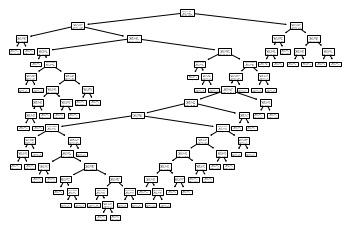

In [96]:
dt_clf = DecisionTreeClassifier(random_state=42)

fig = plt.figure()
dt_clf.fit(X_train, y_train)
tree.plot_tree(dt_clf);

Como se puede ver, el arbol queda ya muy reducido, como se considera que se ha creado de forma reducida se decide no podarlo.

In [98]:
predicciones = clasificacion(X_train, X_test, y_train, y_test, dt_clf);

Exactitud: 0.928082191780822
Recall: 0.928082191780822
F1_Score: 0.929678224628553
Matriz de confusion:
 [[ 15   9   0]
 [  8 255   3]
 [  0   1   1]]


Las metricas de error salen muy buenas, con una exactitud del 0.928%, la matriz de confusión marca que los datos para las clases 1 y 2 salen buenas, pero para la tercera clase no tiene buena clasificacion debido a su falta de datos, solo marca un dato como perteneciente a la clase. 

##### Random forests

Para los bosques se va a seguir el mismo proceso que para los arboles. Para evitar añadir error por la separación de los datos, se va a usar exactamente la misma que para el arbol de decisión.

In [91]:
rf_clf = RandomForestClassifier(random_state=42)

Se grafican los resultados de exactitud con diferentes numeros de arboles en el rendom forest.

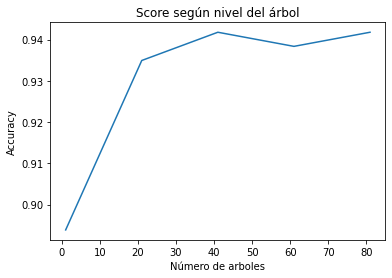

In [92]:
values = []
for n in np.arange(1,100,20):
    rf_clf.set_params(n_estimators=n)
    predicciones = clasificacion(X_train, X_test, y_train, y_test, rf_clf, True)
    values.append(accuracy_score(y_test, predicciones))

plt.title("Score según nivel del árbol")
plt.xlabel("Número de arboles")
plt.ylabel("Accuracy")
plt.plot(np.arange(1,100,20), values)
plt.show()

Los mejores valores se obtienen en el valor de 40 arboles, por lo tanto se usa este número para el random forest.

In [94]:
rf_clf = RandomForestClassifier(n_estimators = 40, random_state=42)
predicciones = clasificacion(X_train, X_test, y_train, y_test, rf_clf);

Exactitud: 0.9417808219178082
Recall: 0.9417808219178082
F1_Score: 0.935407048613739
Matriz de confusion:
 [[ 11  13   0]
 [  1 263   2]
 [  0   1   1]]


En este caso se obtiene un valor de exactitud de 0.948, que es un valor muy bueno y esto indica que el bosque predecira con gran acierto.

Obersvando la matriz de confusión, se puede ver que para la clase 3 tampoco hay verdaderos positivos, y los otros son errores.

En este caso, el bosque supera al arbol por un margen bajo, por lo tanto se considera que el modelo de random forest es mejor. En ambas hay mala clasificacion para la tercera variable, por lo que se podría valorar el juntar la clase 2 con la clase número 3, pero como lo que se ganaría no aportaría ninguna diferencia de como se encuentra actualmente, se ha considerado que mantener las tres clases es la mejor opción.